Import libraries and load the dataset


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(" MNIST dataset loaded successfully from the web.\n")

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (needed for CNN: (28,28,1))
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
 MNIST dataset loaded successfully from the web.

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Visualize the Class Distribution

/tmp/ipython-input-3698399419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


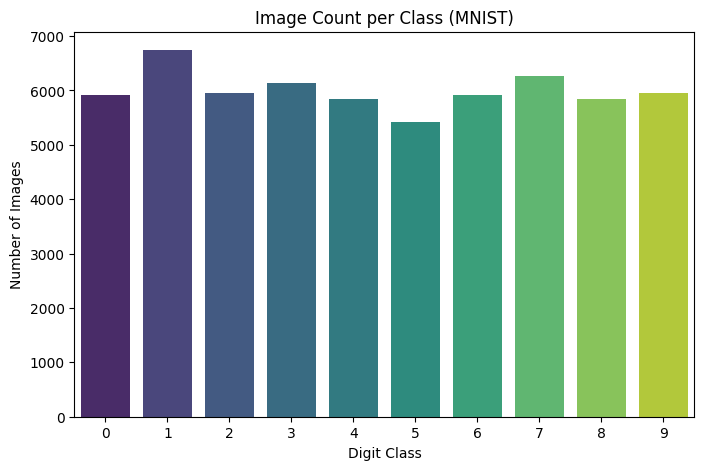

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Count how many samples per class in training set
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8,5))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.title("Image Count per Class (MNIST)")
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.show()


Showing one sample per class

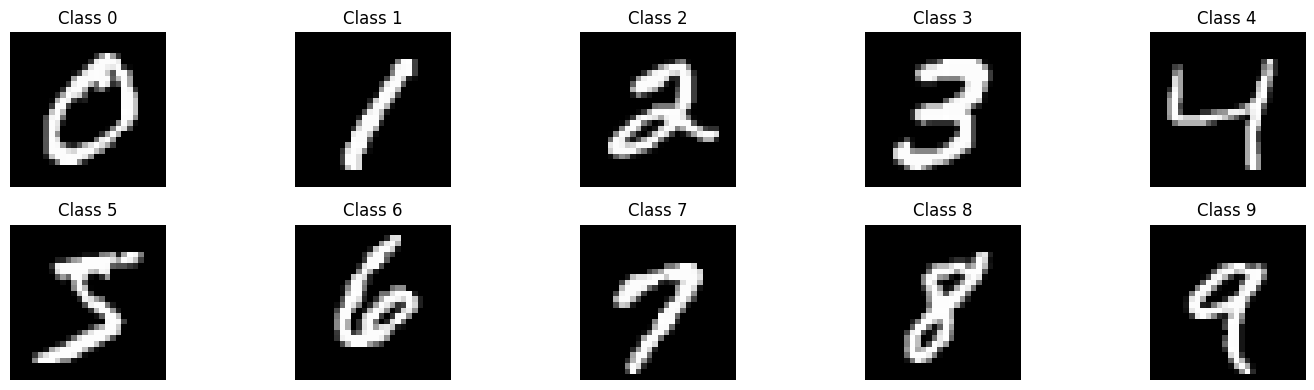

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(y_train)  # digits 0–9

plt.figure(figsize=(15, 4))

for i, c in enumerate(classes):
    # Find the first index of this class
    idx = np.where(y_train == c)[0][0]

    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx].reshape(28,28), cmap="gray")
    plt.title(f"Class {c}")
    plt.axis("off")

plt.tight_layout()
plt.show()

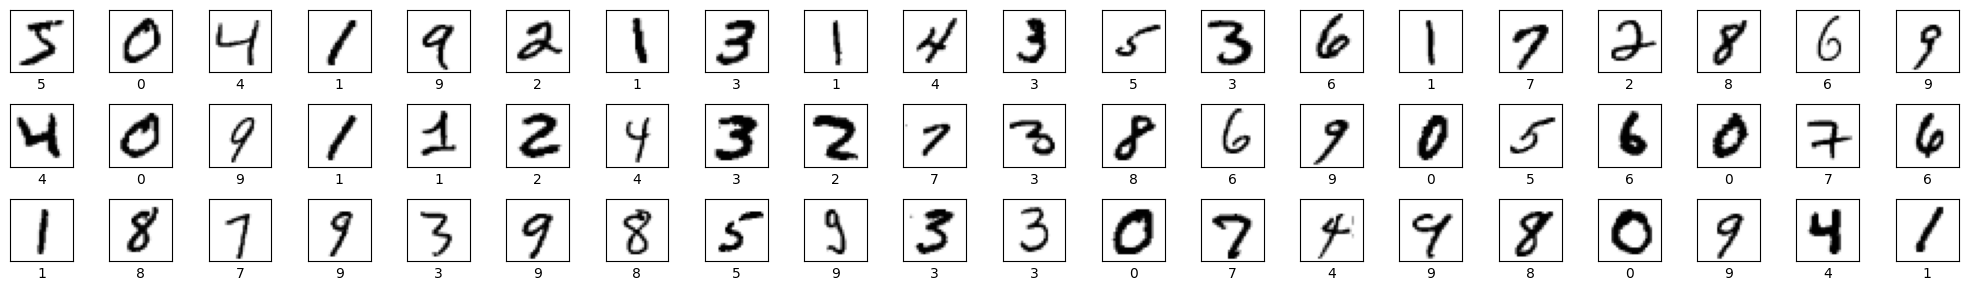

In [ ]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()


Data Genarator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Parameters
IMG_SIZE = 28
BATCH_SIZE = 32

# Reshape x_train and x_test to add channel dimension
x_train_exp = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test_exp = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert y_train and y_test to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

# ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_batches = datagen.flow(
    x_train_exp, y_train_cat,
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True
)

valid_batches = datagen.flow(
    x_train_exp, y_train_cat,
    batch_size=BATCH_SIZE,
    subset='validation'
)

# Check number of samples
print("Train samples:", train_batches.n)
print("Validation samples:", valid_batches.n)




Train samples: 48000
Validation samples: 12000


Plotting the train and validation sample in graph

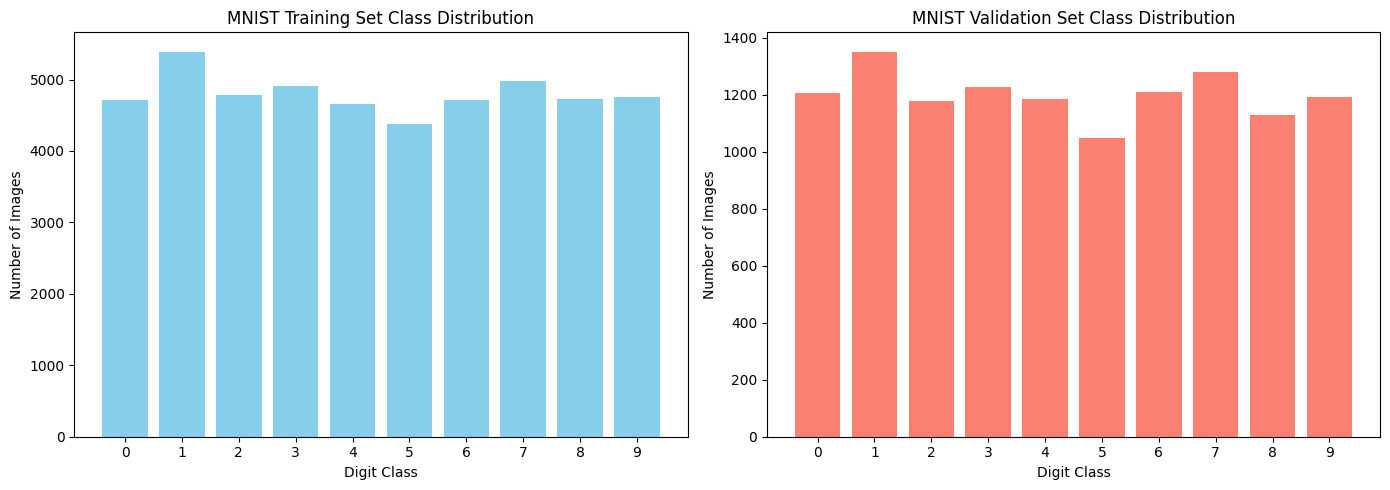

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Split data for training and validation
val_split = 0.2
num_val = int(len(x_train) * val_split)

# Training set
x_train_subset = x_train[num_val:]
y_train_subset = y_train[num_val:]

# Validation set
x_val = x_train[:num_val]
y_val = y_train[:num_val]

# Count samples per class
train_unique, train_counts = np.unique(y_train_subset, return_counts=True)
val_unique, val_counts = np.unique(y_val, return_counts=True)

# Plotting
plt.figure(figsize=(14,5))

# Training set
plt.subplot(1,2,1)
plt.bar(train_unique, train_counts, color='skyblue')
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.title("MNIST Training Set Class Distribution")
plt.xticks(train_unique)

# Validation set
plt.subplot(1,2,2)
plt.bar(val_unique, val_counts, color='salmon')
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.title("MNIST Validation Set Class Distribution")
plt.xticks(val_unique)

plt.tight_layout()
plt.show()





Build the Model using CNN


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Parameters
IMG_ROWS, IMG_COLS = 28, 28
NUM_CLASSES = 10

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape to (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_test_cat = to_categorical(y_test, NUM_CLASSES)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:

# Parameters
EPOCHS = 8
BATCH_SIZE = 64

# Train the CNN model
history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8333 - loss: 0.5242 - val_accuracy: 0.9824 - val_loss: 0.0550
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.9737 - loss: 0.0892 - val_accuracy: 0.9871 - val_loss: 0.0375
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9807 - loss: 0.0617 - val_accuracy: 0.9890 - val_loss: 0.0298
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9851 - loss: 0.0485 - val_accuracy: 0.9917 - val_loss: 0.0258
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.9883 - loss: 0.0408 - val_accuracy: 0.9925 - val_loss: 0.0222
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9887 - loss: 0.0355 - val_accuracy: 0.9913 - val_loss: 0.0242
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9910 - loss: 0.0283 - val_accuracy: 0.9912 - val_loss: 0.0269
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9913 - loss: 0.0283 - val_accu

Ploting the Training History

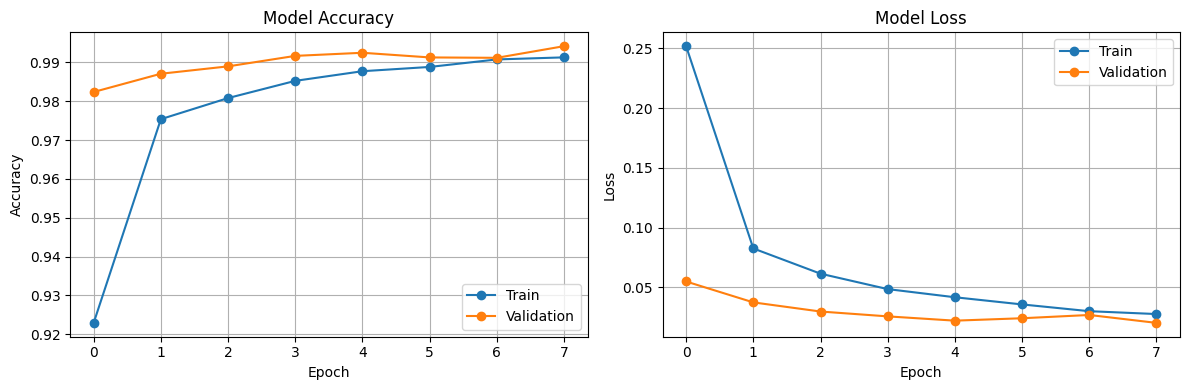

In [ ]:
import matplotlib.pyplot as plt

# Plot Training History
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train')
plt.plot(history.history['val_loss'], marker='o', label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



Save the trained model


In [ ]:
from google.colab import files

model.save("mnist_cnn_model.keras")

files.download("mnist_cnn_model.keras")

print("Model loaded successfully!")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model loaded successfully!


import libraries

In [ ]:
# Loading the dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import datetime
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import preprocess_input
import pandas as pd

load the trainned model

In [ ]:
# Loading the trained model
IMG_SIZE = 128
model_path = '/content/mnist_cnn_model.keras'  # Corrected file path
model = load_model(model_path)


load class name

In [ ]:
import tensorflow as tf

# Load MNIST dataset directly from the web
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# The classes in MNIST are digits 0–9
class_names = [str(i) for i in range(10)]

print("Loaded Classes:", class_names)
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Loaded Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


Model loaded.


<IPython.core.display.Javascript object>

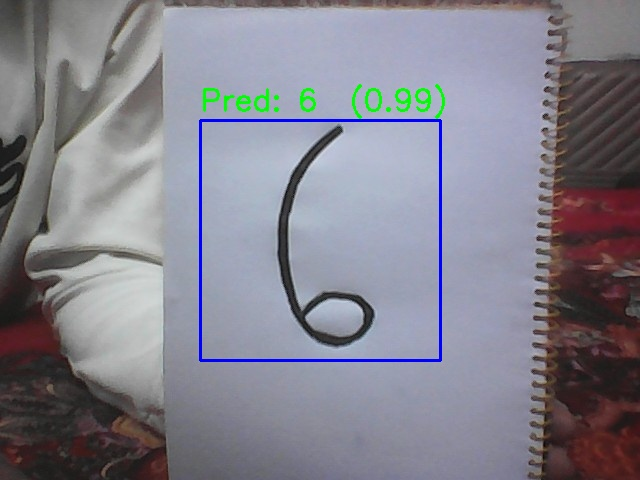

🔎 Debug: threshold | digit crop | 28x28 fed to model


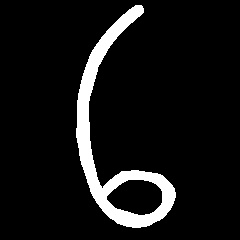

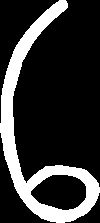

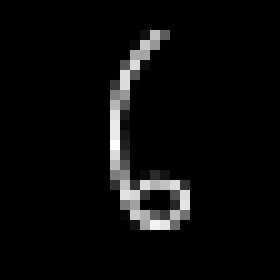

Top-3: [(6, 0.9947364926338196), (8, 0.0028395659755915403), (5, 0.0010585773270577192)]
 Prediction: 6  Confidence: 0.995


In [ ]:

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2, numpy as np, tensorflow as tf
from base64 import b64decode

# Load trained model
MODEL_PATH = "/content/mnist_cnn_model.keras" # Corrected file path
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded.")

#  Helpers
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    return cv2.imdecode(jpg_as_np, flags=1)

def _center_by_moments(img28):

    m = cv2.moments(img28)
    if abs(m["m00"]) < 1e-5:
        return img28
    cx, cy = m["m10"]/m["m00"], m["m01"]/m["m00"]
    tx, ty = int(14 - cx), int(14 - cy)
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img28, M, (28, 28))

def preprocess_mnist_robust(roi, return_debug=False):
    # grayscale & denoise a bit (helps Otsu)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    #  Try INV first (works for dark digit on light paper)
    _, th_inv = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    white_ratio = np.mean(th_inv == 255)

    # If almost everything is white, try the non-inverted version and invert it after
    if white_ratio > 0.9:
        _, th_norm = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresh = cv2.bitwise_not(th_norm)  # ensure digit is white, bg black
    else:
        thresh = th_inv

    #  clean small specks, thicken a bit
    kernel = np.ones((3,3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    thresh = cv2.dilate(thresh, kernel, iterations=1)

    # Find largest contour (the digit)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    H, W = thresh.shape[:2]
    debug_images = {"thresh": thresh.copy()}

    if not contours:
        canvas = np.zeros((28,28), np.uint8)
        x28 = canvas.astype("float32")/255.0
        x28 = x28.reshape(1,28,28,1)
        return (x28, debug_images) if return_debug else x28

    c = max(contours, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # Reject if too small relative to ROI (nothing meaningful)
    if w*h < 0.001 * (W*H):
        canvas = np.zeros((28,28), np.uint8)
        x28 = canvas.astype("float32")/255.0
        x28 = x28.reshape(1,28,28,1)
        return (x28, debug_images) if return_debug else x28

    digit = thresh[y:y+h, x:x+w]

    # 4) resize to fit 20x20 keeping aspect ratio
    scale = 20.0 / max(w, h)
    new_w, new_h = max(1, int(w*scale)), max(1, int(h*scale))
    digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # place on 28x28 canvas
    canvas = np.zeros((28,28), dtype=np.uint8)
    x_off = (28 - new_w)//2
    y_off = (28 - new_h)//2
    canvas[y_off:y_off+new_h, x_off:x_off+new_w] = digit_resized

    # 5) center by moments (MNIST-like centering)
    canvas = _center_by_moments(canvas)

    debug_images.update({"digit_cropped": digit, "canvas28": canvas})

    # normalize for model
    x28 = (canvas.astype("float32") / 255.0).reshape(1,28,28,1)
    return (x28, debug_images) if return_debug else x28

#  Single-shot capture via JS (Colab)
def take_photo_and_recognize(quality=0.9, roi_size=240, show_debug=True):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const btn = document.createElement('button');
        btn.textContent = 'Capture';
        btn.style.marginBottom = '8px';
        div.appendChild(btn);
        const video = document.createElement('video');
        video.style.display = 'block';
        video.style.border = '1px solid #ccc';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
        await new Promise((resolve) => btn.onclick = resolve);
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js(f'takePhoto({quality})')
    frame = js_to_image(data)

    # draw ROI box (centered)
    H, W, _ = frame.shape
    s = roi_size
    x1, y1 = (W - s)//2, (H - s)//2
    x2, y2 = x1 + s, y1 + s
    roi = frame[y1:y2, x1:x2].copy()

    # preprocess + predict
    x28, dbg = preprocess_mnist_robust(roi, return_debug=True)
    probs = model.predict(x28, verbose=0)[0]
    top3 = probs.argsort()[-3:][::-1]
    pred = int(top3[0])
    conf = float(probs[pred])

    # annotate and display
    out = frame.copy()
    cv2.rectangle(out, (x1,y1), (x2,y2), (255, 0, 0), 2)
    cv2.putText(out, f"Pred: {pred}  ({conf:.2f})", (x1, max(30, y1-10)),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 2)
    cv2.imwrite("captured_with_pred.jpg", out)
    display(Image("captured_with_pred.jpg"))

    # show debug views (what the model sees)
    if show_debug:
        cv2.imwrite("debug_thresh.jpg", dbg["thresh"])
        cv2.imwrite("debug_digit_crop.jpg", dbg["digit_cropped"])
        # upscale 28x28 for visibility
        canvas_big = cv2.resize(dbg["canvas28"], (280, 280), interpolation=cv2.INTER_NEAREST)
        cv2.imwrite("debug_canvas28.jpg", canvas_big)
        print("🔎 Debug: threshold | digit crop | 28x28 fed to model")
        display(Image("debug_thresh.jpg"))
        display(Image("debug_digit_crop.jpg"))
        display(Image("debug_canvas28.jpg"))

    # print top-3 to sanity-check confidence
    print("Top-3:", [(int(k), float(probs[k])) for k in top3])
    print(f" Prediction: {pred}  Confidence: {conf:.3f}")

take_photo_and_recognize()


In [ ]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

IMG_SIZE = 28

(_, _), (x_test, y_test) = mnist.load_data()

# Preprocess images
x_test = x_test.astype("float32") / 255.0
x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert labels to one-hot encoding
y_test_cat = to_categorical(y_test, 10)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=1)
print(f"\n Test Accuracy: {test_acc*100:.1f}%")
print(f" Test Loss: {test_loss*100:.1f}%\n")

preds = model.predict(x_test[:10])
y_pred = np.argmax(preds, axis=1)
print("First 10 Predictions vs Actuals:")
for i in range(10):
    print(f"Image {i+1}: Predicted = {y_pred[i]}, Actual = {y_test[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9919 - loss: 0.0251

 Test Accuracy: 99.4%
 Test Loss: 2.0%



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
First 10 Predictions vs Actuals:
Image 1: Predicted = 7, Actual = 7
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 1, Actual = 1
Image 4: Predicted = 0, Actual = 0
Image 5: Predicted = 4, Actual = 4
Image 6: Predicted = 1, Actual = 1
Image 7: Predicted = 4, Actual = 4
Image 8: Predicted = 9, Actual = 9
Image 9: Predicted = 5, Actual = 5
Image 10: Predicted = 9, Actual = 9
